In [1]:
# Sample API
import mae6225
import simulation
mae6225.__version__

'0.1.dev'

In [2]:
# Define grid parameters
ivar = 0
rvar = 1
asol = 2
eror = 3

center_vars = 4

nx = 80
ny = 80

xmin = 0
xmax = 1

ymin = 0
ymax = 1

grid = mae6225.Grid(center_vars,nx,ny,xmin,xmax,ymin,ymax)

In [3]:
# Calculate the exact solution 
simulation.get_analytical(grid,asol)

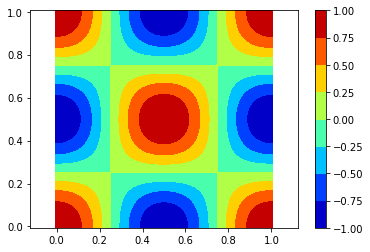

In [4]:
# Plot the exact solution
mae6225.io.plot_contour(grid,asol)

In [5]:
# Calculate the RHS
simulation.get_RHS(grid,rvar)

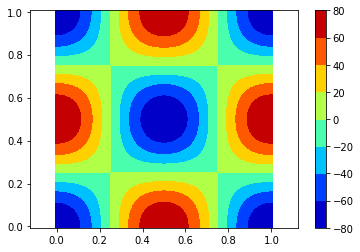

In [6]:
# Plot RHS
mae6225.io.plot_contour(grid,rvar)

In [7]:
# Solve Poisson equation
total_iterations,residual = mae6225.poisson.solve_jacobi(grid,ivar,rvar,max_iterations=7000,tol=1e-9)

In [8]:
# Check iterations
total_iterations

4624

In [9]:
# Check residual
residual

9.9951941238940192e-10

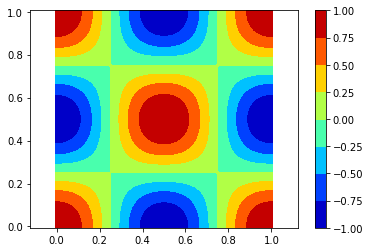

In [10]:
# Plot the numerical solution
mae6225.io.plot_contour(grid,ivar)

In [11]:
# Calculate error
mae6225.poisson.get_error(grid,eror,ivar,asol)

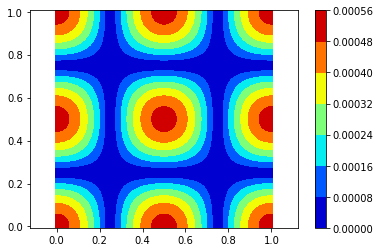

In [12]:
# Plot error
mae6225.io.plot_contour(grid,eror)